In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lzma
import pickle

from matplotlib.lines import Line2D
from scipy import special

In [2]:
load_Dir = "../Data/"

## Gaussian

In [3]:
file_name = "DF_BP_1308.xz"
with lzma.open(load_Dir  + file_name, "rb") as f:
    data_frame_BP = pickle.load(f)

file_name = "DF_20250616-c2BP.xz"
with lzma.open(load_Dir  + file_name, "rb") as f:
    data_frame_BP2 = pickle.load(f)

In [4]:
data_frame_BP[r"$\rho$"] = data_frame_BP["M"]
data_frame_BP[r"$\delta$"] = data_frame_BP["S"]
data_frame_BP2[r"$\rho$"] = data_frame_BP2["M"]
data_frame_BP2[r"$\delta$"] = data_frame_BP2["S"]

In [6]:
dataBPcm1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.841345)& (data_frame_BP["init"] == "rnd")]
dataBPc0 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.5)& (data_frame_BP["init"] == "rnd")]
dataBPc1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.158655)& (data_frame_BP["init"] == "rnd")]

In [8]:
file_name = "DF_Gaussian_1308.xz"
with lzma.open(load_Dir  +  file_name, "rb") as f:
    data_frame = pickle.load(f)
#add more points
file_name = "DF_gauss_final-2.xz"
with lzma.open(load_Dir  +  file_name, "rb") as f:
    data_frame_2 = pickle.load(f)
data_frame_2 = data_frame_2[data_frame_2["c"]==2]
data_frame = pd.concat([data_frame, data_frame_2], ignore_index=True)

In [9]:
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\alpha$"] = np.int32(data_frame[r"$N$"]/data_frame[r"$M$"])

In [10]:
data_frame_tot = data_frame.copy()
data_frame = data_frame[data_frame["init"]=="rnd"]
data_frame.iloc[:,0:5]

,init,graph_type,$N$,$d$,$\lambda$
0,rnd,rrg,20000,3,1.0
1,rnd,rrg,20000,3,1.0
2,rnd,rrg,20000,3,1.0
3,rnd,rrg,20000,3,1.0
4,rnd,rrg,20000,3,1.0
...,...,...,...,...,...
18775,rnd,rrg,20000,3,1.0
18776,rnd,rrg,20000,3,1.0
18777,rnd,rrg,20000,3,1.0
18778,rnd,rrg,20000,3,1.0


In [11]:
datacm1 = data_frame[(data_frame["c"] == -1) & (data_frame[r"$\alpha$"] < 50)]
datac0 = data_frame[(data_frame["c"] == 0) & (data_frame[r"$\alpha$"] < 50)]
datac1 = data_frame[(data_frame["c"] == 1) & (data_frame[r"$\alpha$"] < 50)]
datac2 = data_frame[(data_frame["c"] == 2) & (data_frame[r"$\alpha$"] < 50)]

Choose the observable:

In [12]:
#y_s = '$MO_{t=0}$'
#y_s = 'MSE'
#y_s = r'$R_{MSE}$'
y_s = r"$\widetilde{O}_{t=0}$"

Plot:

In [13]:
dataBPcm2 = data_frame_BP2[(data_frame_BP2["init"] == "rnd")]
rho_list = np.sort(data_frame_BP[r"$\rho$"].unique())
rho_list2 = np.sort(data_frame_BP2[r"$\rho$"].unique())
rMO_m1 = np.zeros(len(rho_list))
rMO_0 = np.zeros(len(rho_list))
rMO_1 = np.zeros(len(rho_list))
rMO_2 = np.zeros(len(rho_list2))
for i,rho in enumerate(rho_list):
    rMO_m1[i] = dataBPcm1[dataBPcm1[r"$\rho$"] == rho][y_s].mean()
    rMO_0[i] = dataBPc0[dataBPc0[r"$\rho$"] == rho][y_s].mean()
    rMO_1[i] = dataBPc1[dataBPc1[r"$\rho$"] == rho][y_s].mean()
for i,rho in enumerate(rho_list2):
    rMO_2[i] = dataBPcm2[dataBPcm2[r"$\rho$"] == rho][y_s].mean()

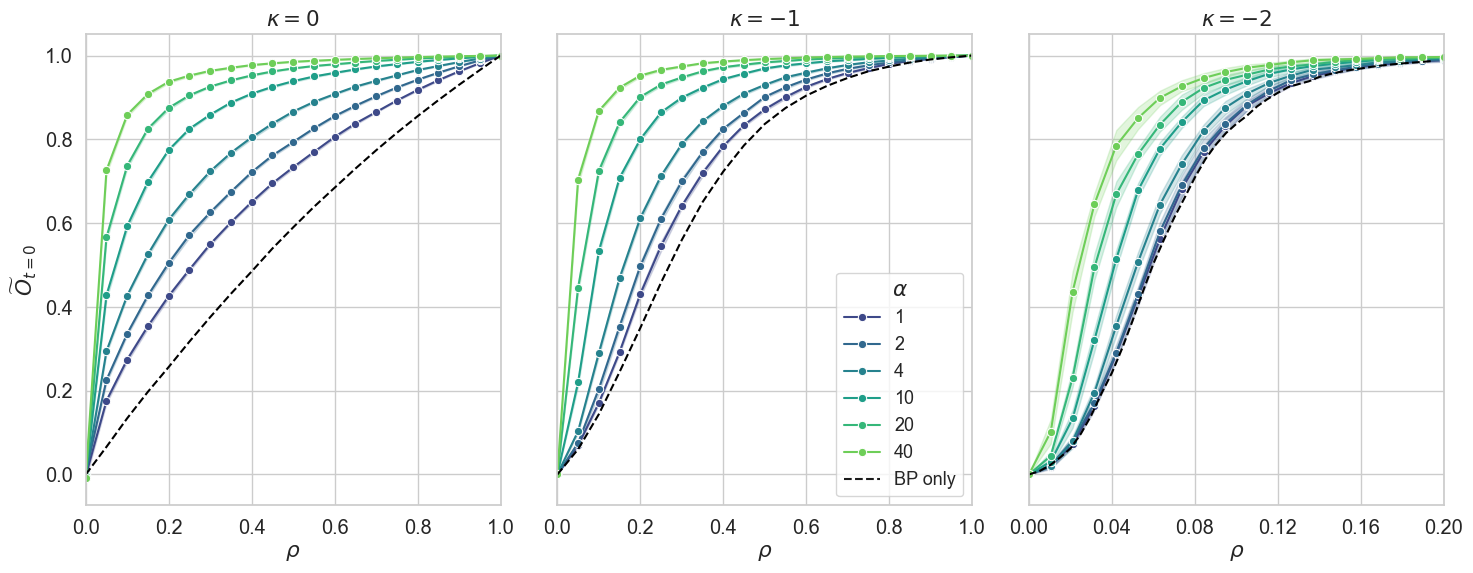

In [17]:
palette = sns.color_palette("viridis",8)[1:7]
#Add BP curves to the previous plot
x_s= r"$\rho$"
hue_s = r"$\alpha$"
y_s = "$\widetilde{O}_{t=0}$"
#y_s = r'$R_{SE}$'
fig, axs = plt.subplots(1, 3, figsize=(15,6), sharey=True)
#fig.suptitle(f"SI, Rademacher $\omega$, $N={N}$, $\lambda={lam}$")
sns.set_theme(style="whitegrid",font_scale=1.3)
sns.lineplot(data=datac0,hue=hue_s,y=y_s, x=x_s, ax=axs[0],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend=None)
sns.lineplot(data=datac1,hue=hue_s,y=y_s, x=x_s, ax=axs[1],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datac2,hue=hue_s,y=y_s, x=x_s, ax=axs[2],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend=None)
axs[0].set_title(r"$\kappa=0$")
axs[1].set_title(r"$\kappa=-1$")
axs[2].set_title(r"$\kappa=-2$")
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,0.2)
axs[0].plot(rho_list, rMO_0, color="black", linestyle="--")
axs[1].plot(rho_list, rMO_1, color="black", linestyle="--")
axs[2].plot(rho_list2, rMO_2, color="black", linestyle="--")
# Add second legend for BP curves without substituting the first legend
line_bp = Line2D([0], [0], label='BP only', color='k', linestyle='--')
#handles, labels = axs[0].get_legend_handles_labels()
#handles.append(line_bp)
#labels.append('BP only')
#axs[0].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[1].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[1].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

#handles, labels = axs[2].get_legend_handles_labels()
#handles.append(line_bp)
#labels.append('BP only')
#axs[2].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")
axs[2].set_xticks([0,0.04,0.08,0.12,0.16,0.2])
plt.tight_layout()
plt.show()
fig.savefig(f"../Plots/Figure3.pdf")#,dpi=600)

In [18]:
y_s = r'$R_{SE}$'

In [19]:
dataBPcm2 = data_frame_BP2[(data_frame_BP2["init"] == "rnd")]
rho_list = np.sort(data_frame_BP[r"$\rho$"].unique())
rho_list2 = np.sort(data_frame_BP2[r"$\rho$"].unique())
rMO_m1 = np.zeros(len(rho_list))
rMO_0 = np.zeros(len(rho_list))
rMO_1 = np.zeros(len(rho_list))
rMO_2 = np.zeros(len(rho_list2))
for i,rho in enumerate(rho_list):
    rMO_m1[i] = dataBPcm1[dataBPcm1[r"$\rho$"] == rho][y_s].mean()
    rMO_0[i] = dataBPc0[dataBPc0[r"$\rho$"] == rho][y_s].mean()
    rMO_1[i] = dataBPc1[dataBPc1[r"$\rho$"] == rho][y_s].mean()
for i,rho in enumerate(rho_list2):
    rMO_2[i] = dataBPcm2[dataBPcm2[r"$\rho$"] == rho][y_s].mean()

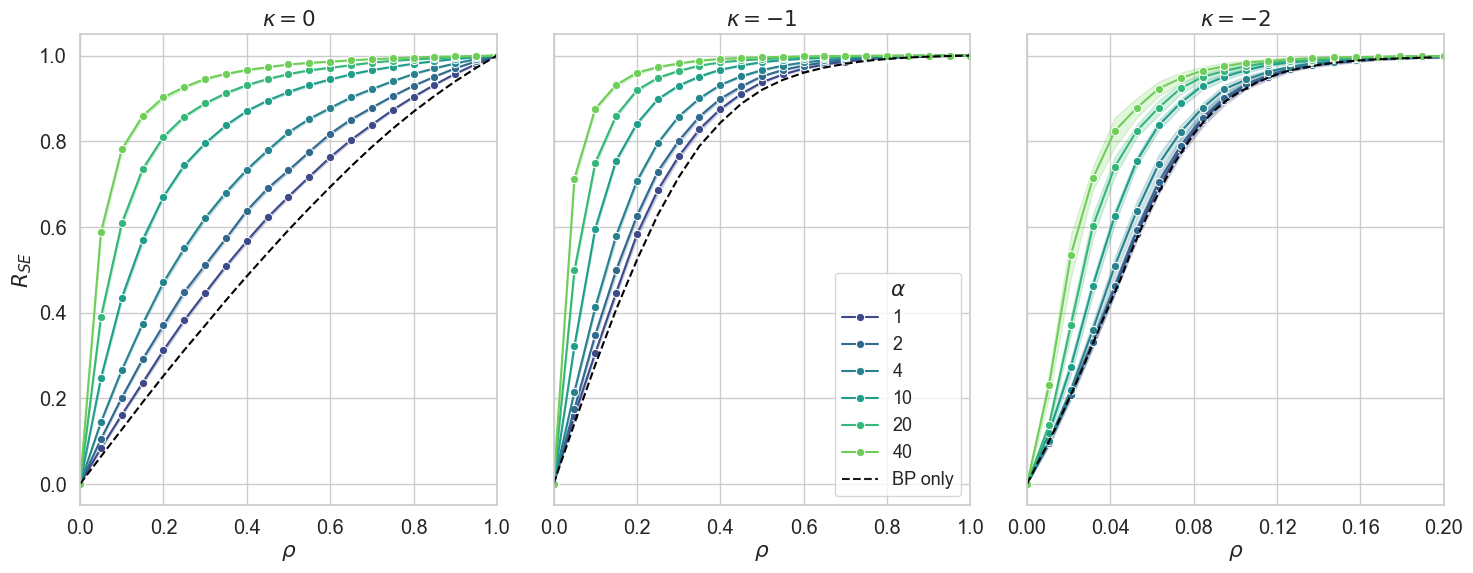

In [20]:
#Add BP curves to the previous plot
x_s= r"$\rho$"
hue_s = r"$\alpha$"
#y_s = "$\widetilde{O}_{t=0}$"
y_s = r'$R_{SE}$'
fig, axs = plt.subplots(1, 3, figsize=(15,6), sharey=True)
#fig.suptitle(f"SI, Rademacher $\omega$, $N={N}$, $\lambda={lam}$")
sns.set_theme(style="whitegrid",font_scale=1.3)
sns.lineplot(data=datac0,hue=hue_s,y=y_s, x=x_s, ax=axs[0],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend=None)
sns.lineplot(data=datac1,hue=hue_s,y=y_s, x=x_s, ax=axs[1],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datac2,hue=hue_s,y=y_s, x=x_s, ax=axs[2],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend=None)
axs[0].set_title(r"$\kappa=0$")
axs[1].set_title(r"$\kappa=-1$")
axs[2].set_title(r"$\kappa=-2$")
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,0.2)
axs[0].plot(rho_list, rMO_0, color="black", linestyle="--")
axs[1].plot(rho_list, rMO_1, color="black", linestyle="--")
axs[2].plot(rho_list2, rMO_2, color="black", linestyle="--")
# Add second legend for BP curves without substituting the first legend
line_bp = Line2D([0], [0], label='BP only', color='k', linestyle='--')
#handles, labels = axs[0].get_legend_handles_labels()
#handles.append(line_bp)
#labels.append('BP only')
#axs[0].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[1].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[1].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

#handles, labels = axs[2].get_legend_handles_labels()
#handles.append(line_bp)
#labels.append('BP only')
#axs[2].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")
axs[2].set_xticks([0,0.04,0.08,0.12,0.16,0.2])
plt.tight_layout()
plt.show()
fig.savefig(f"../Plots/Figure10.pdf")#,dpi=600)

## Rademacher

In [60]:
file_name = "DF_20250616-c2phd.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
len(data_frame)

4099

In [61]:
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\alpha$"] = data_frame[r"$N$"]/data_frame[r"$M$"]

In [62]:
data_frame_tot = data_frame.copy()
data_frame = data_frame[data_frame["init"]=="rnd"]
data_frame.iloc[:,0:5]

,init,graph_type,$N$,$d$,$\lambda$
0,rnd,rrg,86602,3,1.0
1,rnd,rrg,122474,3,1.0
2,rnd,rrg,86602,3,1.0
3,rnd,rrg,122474,3,1.0
4,rnd,rrg,50000,3,1.0
...,...,...,...,...,...
4094,rnd,rrg,86602,3,1.0
4095,rnd,rrg,244948,3,1.0
4096,rnd,rrg,50000,3,1.0
4097,rnd,rrg,173206,3,1.0


In [63]:
datacm2 = data_frame

In [64]:
datacm2_ = data_frame[ (data_frame["c"] == 2) & ((data_frame[r"$\widetilde{MO}_{t=0}$"] - data_frame[r"$\widetilde{O}_{t=0}$"]) <0.005) ]
len(datacm2_)

3473

In [65]:
file_name = "DF_20250525-211918_962.xz"
with lzma.open(load_Dir + file_name, "rb") as f:
    data_frame = pickle.load(f)
len(data_frame)

6300

In [66]:
data_frame[r"$\rho$"] = data_frame["M"]
data_frame[r"$\alpha$"] = data_frame[r"$N$"]/data_frame[r"$M$"]

In [67]:
data_frame_tot = data_frame.copy()
data_frame = data_frame[data_frame["init"]=="rnd"]
data_frame.iloc[:,0:5]

,init,graph_type,$N$,$d$,$\lambda$
0,rnd,rrg,160000,3,1.0
1,rnd,rrg,160000,3,1.0
2,rnd,rrg,160000,3,1.0
3,rnd,rrg,160000,3,1.0
4,rnd,rrg,160000,3,1.0
...,...,...,...,...,...
6295,rnd,rrg,80000,3,1.0
6296,rnd,rrg,80000,3,1.0
6297,rnd,rrg,80000,3,1.0
6298,rnd,rrg,80000,3,1.0


In [68]:
datacm1 = data_frame[(data_frame["c"] == -1) & (data_frame[r"$\alpha$"] < 50)]
datac0 = data_frame[(data_frame["c"] == 0) & (data_frame[r"$\alpha$"] < 50)]
datac1 = data_frame[(data_frame["c"] == 1) & (data_frame[r"$\alpha$"] < 50)]

In [69]:
datacm1_ = data_frame[ (data_frame["c"] == -1) & (data_frame[r"$\alpha$"] < 50) & ((data_frame[r"$\widetilde{MO}_{t=0}$"] - data_frame[r"$\widetilde{O}_{t=0}$"]) <0.005) ]
datac1_ = data_frame[ (data_frame["c"] == 1) & (data_frame[r"$\alpha$"] < 50) & ((data_frame[r"$\widetilde{MO}_{t=0}$"] - data_frame[r"$\widetilde{O}_{t=0}$"]) <0.005) ]
datac0_ = data_frame[ (data_frame["c"] == 0) & (data_frame[r"$\alpha$"] < 50) & ((data_frame[r"$\widetilde{MO}_{t=0}$"] - data_frame[r"$\widetilde{O}_{t=0}$"]) <0.005) ]
len(datac0_)

1974

In [70]:
#N=20000
#lam=1
palette = sns.color_palette("viridis",8)[1:6]

In [71]:
datac0_[r"$\alpha$"] = (np.round(datac0_[r"$N$"]/datac0_[r"$M$"])).astype(int)
datac1_[r"$\alpha$"] = (np.round(datac1_[r"$N$"]/datac1_[r"$M$"])).astype(int)
datacm2_[r"$\alpha$"] = (np.round(datacm2_[r"$N$"]/datacm2_[r"$M$"])).astype(int)

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_20810/2486408874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac0_[r"$\alpha$"] = (np.round(datac0_[r"$N$"]/datac0_[r"$M$"])).astype(int)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_20810/2486408874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac1_[r"$\alpha$"] = (np.round(datac1_[r"$N$"]/datac1_[r"$M$"])).astype(int)
/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_20810/2486408874.py:3: SettingWithCopyW

In [72]:
#y_s = '$MO_{t=0}$'
#y_s = 'MSE'
y_s = r'$R_{MSE}$'
y_s = r"$\widetilde{O}_{t=0}$"

In [73]:
dataBPcm1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.841345)& (data_frame_BP["init"] == "rnd")]
dataBPc0 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.5)& (data_frame_BP["init"] == "rnd")]
dataBPc1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.158655)& (data_frame_BP["init"] == "rnd")]

In [74]:
dataBPcm2 = data_frame_BP2[(data_frame_BP2["init"] == "rnd")]
rho_list = np.sort(data_frame_BP[r"$\rho$"].unique())
rho_list2 = np.sort(data_frame_BP2[r"$\rho$"].unique())
rMO_m1 = np.zeros(len(rho_list))
rMO_0 = np.zeros(len(rho_list))
rMO_1 = np.zeros(len(rho_list))
rMO_2 = np.zeros(len(rho_list2))
for i,rho in enumerate(rho_list):
    rMO_m1[i] = dataBPcm1[dataBPcm1[r"$\rho$"] == rho][y_s].mean()
    rMO_0[i] = dataBPc0[dataBPc0[r"$\rho$"] == rho][y_s].mean()
    rMO_1[i] = dataBPc1[dataBPc1[r"$\rho$"] == rho][y_s].mean()
for i,rho in enumerate(rho_list2):
    rMO_2[i] = dataBPcm2[dataBPcm2[r"$\rho$"] == rho][y_s].mean()

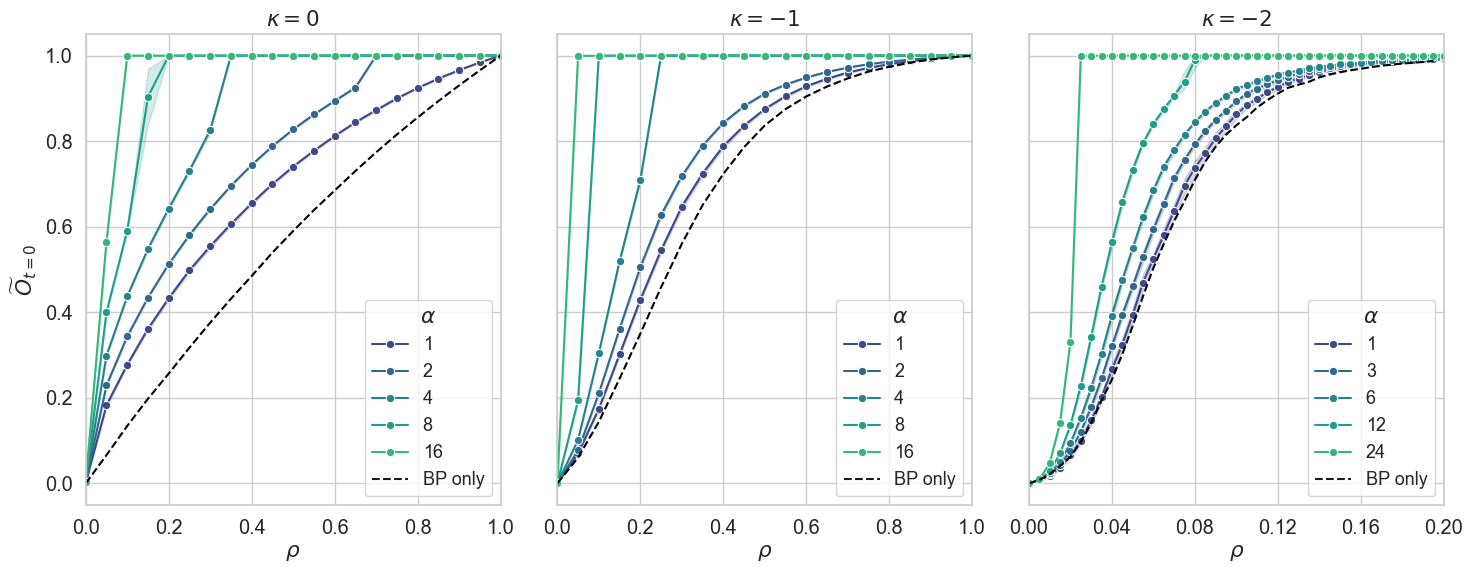

In [75]:
#Add BP curves to the previous plot
x_s= r"$\rho$"
hue_s = r"$\alpha$"
y_s = "$\widetilde{O}_{t=0}$"
#y_s = r'$R_{SE}$'
fig, axs = plt.subplots(1, 3, figsize=(15,6), sharey=True)
#fig.suptitle(f"SI, Rademacher $\omega$, $N={N}$, $\lambda={lam}$")
sns.set_theme(style="whitegrid",font_scale=1.3)
sns.lineplot(data=datac0_,hue=hue_s,y=y_s, x=x_s, ax=axs[0],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datac1_,hue=hue_s,y=y_s, x=x_s, ax=axs[1],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datacm2_,hue=hue_s,y=y_s, x=x_s, ax=axs[2],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
axs[0].set_title(r"$\kappa=0$")
axs[1].set_title(r"$\kappa=-1$")
axs[2].set_title(r"$\kappa=-2$")
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,0.2)
axs[0].plot(rho_list, rMO_0, color="black", linestyle="--")
axs[1].plot(rho_list, rMO_1, color="black", linestyle="--")
axs[2].plot(rho_list2, rMO_2, color="black", linestyle="--")
# Add second legend for BP curves without substituting the first legend
line_bp = Line2D([0], [0], label='BP only', color='k', linestyle='--')
handles, labels = axs[0].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[0].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[1].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[1].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[2].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[2].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")
axs[2].set_xticks([0,0.04,0.08,0.12,0.16,0.2])
plt.tight_layout()
plt.show()
fig.savefig(f"../Plots/Figure4.pdf")#,dpi=600)

In [56]:
#y_s = '$MO_{t=0}$'
#y_s = 'MSE'
y_s = r'$R_{MSE}$'

In [57]:
dataBPcm1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.841345)& (data_frame_BP["init"] == "rnd")]
dataBPc0 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.5)& (data_frame_BP["init"] == "rnd")]
dataBPc1 = data_frame_BP[(data_frame_BP[r"$\delta$"] == 0.158655)& (data_frame_BP["init"] == "rnd")]

In [58]:
dataBPcm2 = data_frame_BP2[(data_frame_BP2["init"] == "rnd")]
rho_list = np.sort(data_frame_BP[r"$\rho$"].unique())
rho_list2 = np.sort(data_frame_BP2[r"$\rho$"].unique())
rMO_m1 = np.zeros(len(rho_list))
rMO_0 = np.zeros(len(rho_list))
rMO_1 = np.zeros(len(rho_list))
rMO_2 = np.zeros(len(rho_list2))
for i,rho in enumerate(rho_list):
    rMO_m1[i] = dataBPcm1[dataBPcm1[r"$\rho$"] == rho][y_s].mean()
    rMO_0[i] = dataBPc0[dataBPc0[r"$\rho$"] == rho][y_s].mean()
    rMO_1[i] = dataBPc1[dataBPc1[r"$\rho$"] == rho][y_s].mean()
for i,rho in enumerate(rho_list2):
    rMO_2[i] = dataBPcm2[dataBPcm2[r"$\rho$"] == rho][y_s].mean()

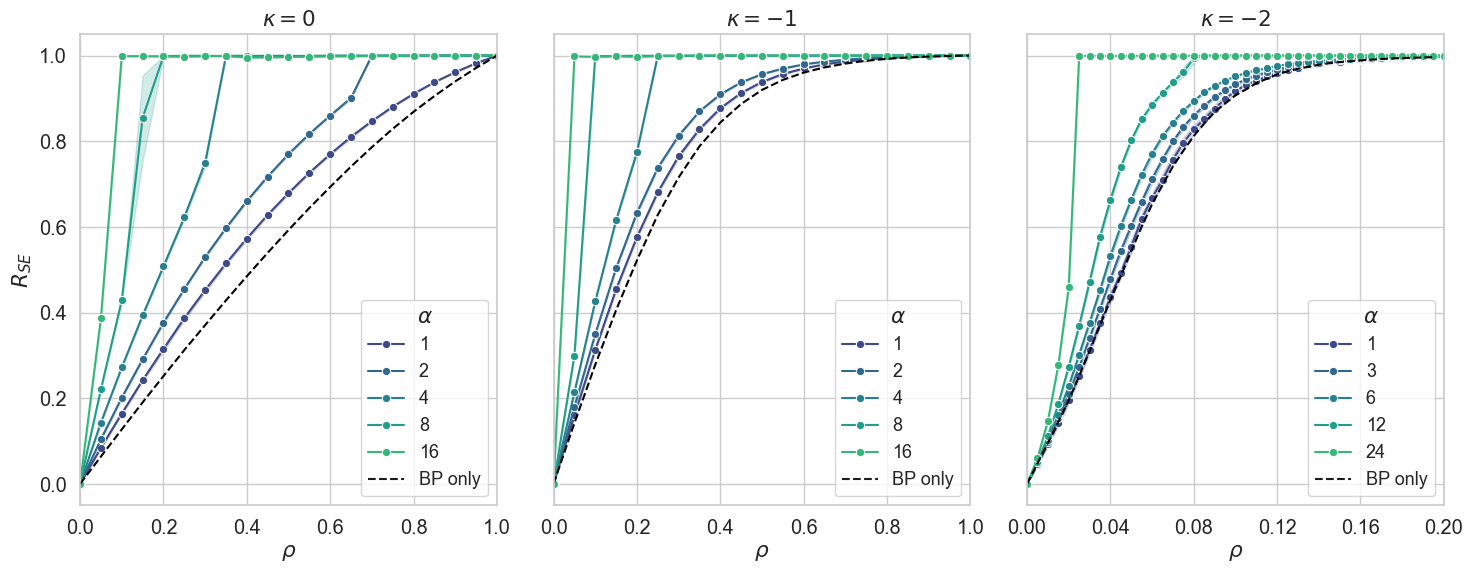

In [59]:
#Add BP curves to the previous plot
x_s= r"$\rho$"
hue_s = r"$\alpha$"
y_s = "$\widetilde{O}_{t=0}$"
y_s = r'$R_{SE}$'
fig, axs = plt.subplots(1, 3, figsize=(15,6), sharey=True)
#fig.suptitle(f"SI, Rademacher $\omega$, $N={N}$, $\lambda={lam}$")
sns.set_theme(style="whitegrid",font_scale=1.3)
sns.lineplot(data=datac0_,hue=hue_s,y=y_s, x=x_s, ax=axs[0],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datac1_,hue=hue_s,y=y_s, x=x_s, ax=axs[1],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
sns.lineplot(data=datacm2_,hue=hue_s,y=y_s, x=x_s, ax=axs[2],palette=sns.color_palette(palette, len(palette)),marker="o",errorbar=("ci",99),legend="full")
axs[0].set_title(r"$\kappa=0$")
axs[1].set_title(r"$\kappa=-1$")
axs[2].set_title(r"$\kappa=-2$")
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,0.2)
axs[0].plot(rho_list, rMO_0, color="black", linestyle="--")
axs[1].plot(rho_list, rMO_1, color="black", linestyle="--")
axs[2].plot(rho_list2, rMO_2, color="black", linestyle="--")
# Add second legend for BP curves without substituting the first legend
line_bp = Line2D([0], [0], label='BP only', color='k', linestyle='--')
handles, labels = axs[0].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[0].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[1].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[1].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")

handles, labels = axs[2].get_legend_handles_labels()
handles.append(line_bp)
labels.append('BP only')
axs[2].legend(handles, labels, loc='lower right', fontsize='small', title=r"$\alpha$")
axs[2].set_xticks([0,0.04,0.08,0.12,0.16,0.2])
plt.tight_layout()
plt.show()
fig.savefig(f"../Plots/Figure11.pdf")#,dpi=600)